<a href="https://colab.research.google.com/github/Atruk/UAI_HW/blob/master/HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт модулей

In [ ]:
from google.colab import files
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# drive.mount('/content/drive')

# Light

## Вариант 1

### Загрузка данных

In [ ]:
!rm -R /content/texts # Проверка наличия папки texts. При наличии ее - удаление

In [ ]:
# Указание пути к базе в Google Drive, создание папки texts и извлечение базы в папку
!unzip -q '/content/drive/My Drive/Тексты писателей.zip' -d /content/texts 

In [ ]:
# Функция для чтения файла
def readText(fileName):
  with open(fileName, 'r') as f:  
  # f = open(fileName, 'r')        
    text = f.read()                
    text = text.replace("\n", " ") 
  
  return text                    

className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"] 
nClasses = len(className) 

In [ ]:
# Загрузка обучающих тестов
trainText = [] # Формирование обучающих текстов
testText = [] # Формирование тестовых текстов

for i in className: 
  for j in os.listdir('texts/'): 
    if i in j: 
       if 'Обучающая' in j:  
        trainText.append(readText('texts/' + j)) 
        print(j, 'добавлен в обучающую выборку') 
       if 'Тестовая' in j: 
        testText.append(readText('texts/' + j)) 
        print(j, 'добавлен в тестовую выборку') 
  print()

(О. Генри) Тестовая_20 вместе.txt добавлен в тестовую выборку
(О. Генри) Обучающая_50 вместе.txt добавлен в обучающую выборку

(Стругацкие) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Стругацкие) Тестовая_2 вместе.txt добавлен в тестовую выборку

(Булгаков) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Булгаков) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Клиффорд_Саймак) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Клиффорд_Саймак) Тестовая_2 вместе.txt добавлен в тестовую выборку

(Макс Фрай) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Макс Фрай) Тестовая_2 вместе.txt добавлен в тестовую выборку

(Рэй Брэдберри) Тестовая_8 вместе.txt добавлен в тестовую выборку
(Рэй Брэдберри) Обучающая_22 вместе.txt добавлен в обучающую выборку



In [ ]:
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
# функция принимает последовательность индексов, размер окна, шаг окна
def getSetFromIndexes(wordIndexes, xLen, step): 
  xSample = [] 
  wordsLen = len(wordIndexes)
  index = 0  

  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen]) 
    index += step 
    
  return xSample


# Формирование обучающей и проверочной выборки
# Из двух листов индексов от двух классов
# Функция принимает последовательность индексов, размер окна, шаг окна
def createSetsMultiClasses(wordIndexes, xLen, step): 
  nClasses = len(wordIndexes) 
  classesXSamples = []        
  for wI in wordIndexes:      
    classesXSamples.append(getSetFromIndexes(wI, xLen, step))  

  xSamples = [] 
  ySamples = [] 
  
  for t in range(nClasses): 
    xT = classesXSamples[t] 
    for i in range(len(xT)): 
      xSamples.append(xT[i]) 
      ySamples.append(utils.to_categorical(t, nClasses)) 

  xSamples = np.array(xSamples) 
  ySamples = np.array(ySamples) 

  
  return (xSamples, ySamples) 


In [ ]:
def create_model01(maxWordsCount):
  model01 = Sequential()
  model01.add(Dense(200, input_dim=maxWordsCount, activation='relu'))
  model01.add(Dropout(0.25))
  model01.add(BatchNormalization())
  model01.add(Dense(6, activation='softmax'))

  # Компиляция НС
  model01.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  
  return model01


**1. Запуск НС с BOW(01) при разных maxWordsCount=[20000, 100, 1000, 10000, 50000]**

START
maxWordsCount=20000
Время обработки: 2.33c
------------------------------------------------------------------------------------------------------------------------
Фрагмент обучающего текста:
Оригинальный текст:               Парень из преисподней     1     Ну и деревня! Сроду я таких деревень не видел и не знал
Текст в виде последовательности индексов:  [473, 22, 1, 1508, 47, 2, 12834, 7800, 5, 415, 1, 4, 251, 2, 4, 249, 55, 6, 240, 9472] 

******************************************************************************************
(17640, 1000)
(17640, 6)
(6686, 1000)
(6686, 6)
Время обработки: 2.2c
******************************************************************************************
(17640, 20000)
[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0

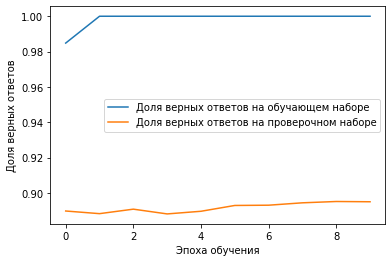

******************************************************************************************
END
################################################## 

START
maxWordsCount=100
Время обработки: 2.26c
------------------------------------------------------------------------------------------------------------------------
Фрагмент обучающего текста:
Оригинальный текст:               Парень из преисподней     1     Ну и деревня! Сроду я таких деревень не видел и не знал
Текст в виде последовательности индексов:  [1, 22, 1, 1, 47, 2, 1, 1, 5, 1, 1, 4, 1, 2, 4, 1, 55, 6, 1, 1] 

******************************************************************************************
(17640, 1000)
(17640, 6)
(6686, 1000)
(6686, 6)
Время обработки: 2.26c
******************************************************************************************
(17640, 100)
[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 

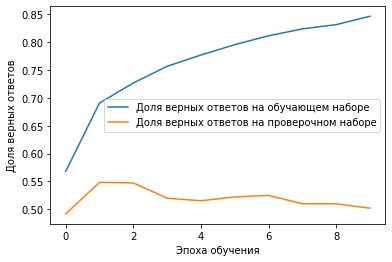

******************************************************************************************
END
################################################## 

START
maxWordsCount=1000
Время обработки: 2.23c
------------------------------------------------------------------------------------------------------------------------
Фрагмент обучающего текста:
Оригинальный текст:               Парень из преисподней     1     Ну и деревня! Сроду я таких деревень не видел и не знал
Текст в виде последовательности индексов:  [473, 22, 1, 1, 47, 2, 1, 1, 5, 415, 1, 4, 251, 2, 4, 249, 55, 6, 240, 1] 

******************************************************************************************
(17640, 1000)
(17640, 6)
(6686, 1000)
(6686, 6)
Время обработки: 2.11c
******************************************************************************************
(17640, 1000)
[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 

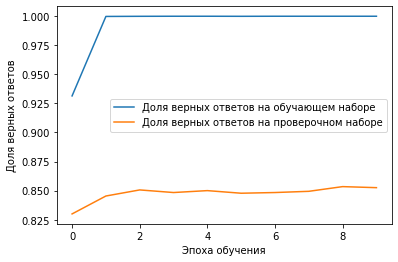

******************************************************************************************
END
################################################## 

START
maxWordsCount=10000
Время обработки: 2.23c
------------------------------------------------------------------------------------------------------------------------
Фрагмент обучающего текста:
Оригинальный текст:               Парень из преисподней     1     Ну и деревня! Сроду я таких деревень не видел и не знал
Текст в виде последовательности индексов:  [473, 22, 1, 1508, 47, 2, 1, 7800, 5, 415, 1, 4, 251, 2, 4, 249, 55, 6, 240, 9472] 

******************************************************************************************
(17640, 1000)
(17640, 6)
(6686, 1000)
(6686, 6)
Время обработки: 2.1c
******************************************************************************************
(17640, 10000)
[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 

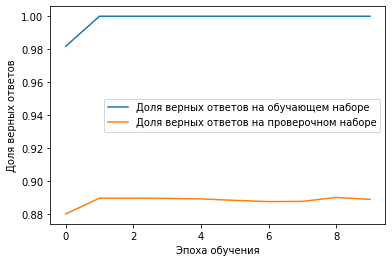

******************************************************************************************
END
################################################## 

START
maxWordsCount=50000
Время обработки: 2.32c
------------------------------------------------------------------------------------------------------------------------
Фрагмент обучающего текста:
Оригинальный текст:               Парень из преисподней     1     Ну и деревня! Сроду я таких деревень не видел и не знал
Текст в виде последовательности индексов:  [473, 22, 29192, 1508, 47, 2, 12834, 7800, 5, 415, 27605, 4, 251, 2, 4, 249, 55, 6, 240, 9472] 

******************************************************************************************
(17640, 1000)
(17640, 6)
(6686, 1000)
(6686, 6)
Время обработки: 2.37c
******************************************************************************************
(17640, 50000)
[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.

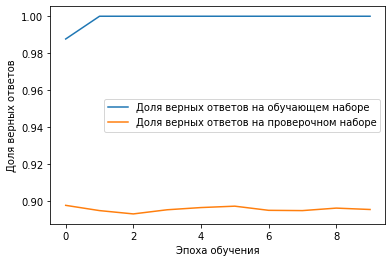

******************************************************************************************
END
################################################## 

acc_arr=[1.0, 0.8467119932174683, 1.0, 1.0, 1.0]
val_acc_arr=[0.8950045108795166, 0.5020939111709595, 0.8525276780128479, 0.8887227177619934, 0.8954532146453857]
5
5
5


In [ ]:
maxWordsCount_arr = [20000, 100, 1000, 10000, 50000]
xLen = 1000
step = 100
acc_arr = []
val_acc_arr = []

for maxWordsCount in maxWordsCount_arr:
  cur_time = time.time() # Текущее время
  print('START')
  print(f'maxWordsCount={maxWordsCount}')

  tokenizer = Tokenizer(num_words=maxWordsCount,
                        filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                        lower=True,
                        split=' ',
                        oov_token='unknown',
                        char_level=False)
  tokenizer.fit_on_texts(trainText)
  print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

  print('---'*40)

  # Преобразование текста в последовательность индексов согласно частотному словарю
  trainWordIndexes = tokenizer.texts_to_sequences(trainText) # Обучающие тесты в индексы
  testWordIndexes = tokenizer.texts_to_sequences(testText) # Проверочные тесты в индексы

  print("Фрагмент обучающего текста:")
  print("Оригинальный текст:              ", trainText[1][:87])
  print("Текст в виде последовательности индексов: ", trainWordIndexes[1][:20], '\n')

  print('***'*30)

  cur_time = time.time()
  # Формирование обучающей и тестовой выборки
  xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) # Извлечение обучающей выборки
  xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step) # Извлечение тестовой выборки
  print(xTrain.shape)
  print(yTrain.shape)
  print(xTest.shape)
  print(yTest.shape)
  print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

  print('***'*30)

  cur_time = time.time() # Текущее время
  # Преобразование полученных выборок из последовательности индексов
  #  в матрицы нудей и единиц по принципу Bag of Word
  xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
  xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

  print(xTrain01.shape)       # Размер обучающей выборки, сформированной по Bag of Words
  print(xTrain01[0][0:100]) # Фрагмент набора слов в виде Bag of Words
  print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

  for i in range(100):
    print(int(i in xTrain[0]), end=' ')

  print('***'*30)

  model01 = create_model01(maxWordsCount)
  # Обучение сети на выборке, сформированной по BOW - xTrain01
  history = model01.fit(xTrain01,
                        yTrain,
                        epochs=10,
                        batch_size=128,
                        validation_data=(xTest01, yTest))

  # График точности
  plt.plot(history.history['accuracy'], 
          label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'], 
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()

  acc_arr.append(history.history['accuracy'][-1]) # accuracy на последней эпохе
  val_acc_arr.append(history.history['val_accuracy'][-1]) # val_accuracy на последней эпохе



  print('***'*30)
  print('END')
  print('#'*50, '\n')

print(f'acc_arr={acc_arr}')
print(f'val_acc_arr={val_acc_arr}')
print(len(acc_arr))
print(len(val_acc_arr))
print(len(maxWordsCount_arr))

In [ ]:
df_dict = {'maxWordsCount':maxWordsCount_arr,
           'accuracy_last_epoch': acc_arr,
           'val_acc_last_epoch': val_acc_arr}
df = pd.DataFrame(df_dict)
df

,maxWordsCount,accuracy_last_epoch,val_acc_last_epoch
0,20000,1.000000,0.895005
1,100,0.846712,0.502094
2,1000,1.000000,0.852528
3,10000,1.000000,0.888723
4,50000,1.000000,0.895453


При увеличении maxWordsCount точность модели возрастает. При 20000 (88.84%) и 50000 (88.21%) точности почти одинаковы.

**2. Запуск НС c bag of words (01) при maxWordsCount = 20000 и разных архитектурах:**


*   **A. Поменяйте кол-во нейронов в слоях** 
*  **B. Поменяйте кол-во слоев**
*  **C. Поменяйте активационные функции слоев** 



In [ ]:
maxWordsCount = 20000
xLen = 1000
step = 100

tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)

# Преобразование текста в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText) 

#Формирование обучающей и тестовой выборки
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)

# Преобразование полученных выборок из последовательности индексов
#  в матрицы нулей и единиц по принципу Bag of Words
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

##### А. Различное кол-во нейронов в слоях


--------------------------------------------------
START
hidden_size=200
layer=1
activation_1=relu
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 1s 11ms/step - loss: 0.0439 - accuracy: 0.9868 - val_loss: 0.3839 - val_accuracy: 0.8922
Epoch 2/10
138/138 [==============================] - 1s 8ms/step - loss: 2.8628e-04 - accuracy: 1.0000 - val_loss: 0.3563 - val_accuracy: 0.8877
Epoch 3/10
138/138 [==============================] - 1s 8ms/step - loss: 1.4588e-04 - accuracy: 1.0000 - val_loss: 0.3553 - val_accuracy: 0.8853
Epoch 4/10
138/138 [==============================] - 1s 8ms/step - loss: 9.4500e-05 - accuracy: 1.0000 - val_loss: 0.3551 - val_accuracy: 0.8836
Epoch 5/10
138/138 [==============================] - 1s 8ms/step - loss: 7.0911e-05 - accuracy: 1.0000 - val_loss: 0.3637 - val_accuracy: 0.8808
Epoch 6/10
138/138 [==============================] - 1s 8ms/step - loss: 5.5390e-05 - accuracy: 1.0000 - val_loss: 0.3570 - val_accuracy: 0.8821
Epoch 7

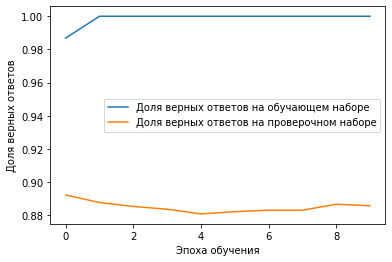

END
************************************************** 

--------------------------------------------------
START
hidden_size=200
layer=1
activation_1=relu
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 1s 10ms/step - loss: 0.4068 - accuracy: 0.9693 - val_loss: 0.6400 - val_accuracy: 0.8693
Epoch 2/10
138/138 [==============================] - 1s 8ms/step - loss: 0.0915 - accuracy: 0.9553 - val_loss: 0.4443 - val_accuracy: 0.8708
Epoch 3/10
138/138 [==============================] - 1s 8ms/step - loss: 0.0591 - accuracy: 0.9577 - val_loss: 0.3467 - val_accuracy: 0.8904
Epoch 4/10
138/138 [==============================] - 1s 8ms/step - loss: 0.0441 - accuracy: 0.9717 - val_loss: 0.2636 - val_accuracy: 0.9115
Epoch 5/10
138/138 [==============================] - 1s 8ms/step - loss: 0.0148 - accuracy: 0.9977 - val_loss: 0.2928 - val_accuracy: 0.8978
Epoch 6/10
138/138 [==============================] - 1s 8ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 

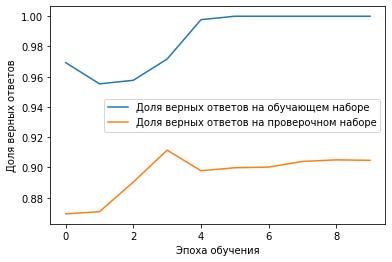

END
************************************************** 

--------------------------------------------------
START
hidden_size=200
layer=1
activation_1=linear
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.4062 - val_accuracy: 0.8646
Epoch 2/10
138/138 [==============================] - 1s 8ms/step - loss: 2.6822e-04 - accuracy: 1.0000 - val_loss: 0.3607 - val_accuracy: 0.8800
Epoch 3/10
138/138 [==============================] - 1s 8ms/step - loss: 1.5127e-04 - accuracy: 1.0000 - val_loss: 0.3538 - val_accuracy: 0.8818
Epoch 4/10
138/138 [==============================] - 1s 8ms/step - loss: 1.0154e-04 - accuracy: 1.0000 - val_loss: 0.3551 - val_accuracy: 0.8799
Epoch 5/10
138/138 [==============================] - 1s 8ms/step - loss: 6.7299e-05 - accuracy: 1.0000 - val_loss: 0.3498 - val_accuracy: 0.8827
Epoch 6/10
138/138 [==============================] - 1s 8ms/step - loss: 5.4449e-05 - accurac

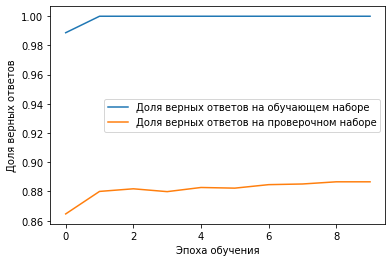

END
************************************************** 

--------------------------------------------------
START
hidden_size=200
layer=1
activation_1=linear
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 1s 10ms/step - loss: 0.3997 - accuracy: 0.9828 - val_loss: 0.8134 - val_accuracy: 0.8558
Epoch 2/10
138/138 [==============================] - 1s 8ms/step - loss: 0.0997 - accuracy: 0.9925 - val_loss: 0.5018 - val_accuracy: 0.8768
Epoch 3/10
138/138 [==============================] - 1s 8ms/step - loss: 0.0455 - accuracy: 0.9951 - val_loss: 0.4102 - val_accuracy: 0.8895
Epoch 4/10
138/138 [==============================] - 1s 8ms/step - loss: 0.0240 - accuracy: 0.9982 - val_loss: 0.3465 - val_accuracy: 0.8944
Epoch 5/10
138/138 [==============================] - 1s 8ms/step - loss: 0.0091 - accuracy: 0.9998 - val_loss: 0.3106 - val_accuracy: 0.9008
Epoch 6/10
138/138 [==============================] - 1s 8ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss

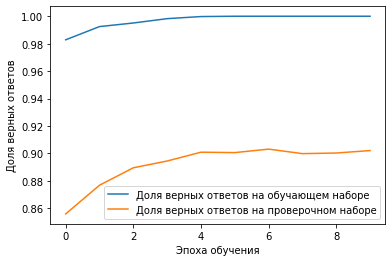

END
************************************************** 

--------------------------------------------------
START
hidden_size=200
layer=2
activation_1=relu
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 11ms/step - loss: 0.0830 - accuracy: 0.9759 - val_loss: 0.4179 - val_accuracy: 0.8530
Epoch 2/10
138/138 [==============================] - 1s 9ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4023 - val_accuracy: 0.8542
Epoch 3/10
138/138 [==============================] - 1s 9ms/step - loss: 6.3797e-04 - accuracy: 1.0000 - val_loss: 0.4033 - val_accuracy: 0.8536
Epoch 4/10
138/138 [==============================] - 1s 9ms/step - loss: 4.2780e-04 - accuracy: 1.0000 - val_loss: 0.4079 - val_accuracy: 0.8519
Epoch 5/10
138/138 [==============================] - 1s 9ms/step - loss: 2.9030e-04 - accuracy: 1.0000 - val_loss: 0.3939 - val_accuracy: 0.8566
Epoch 6/10
138/138 [==============================] - 1s 9ms/step - loss: 2.1574e-04 - accuracy: 1.0

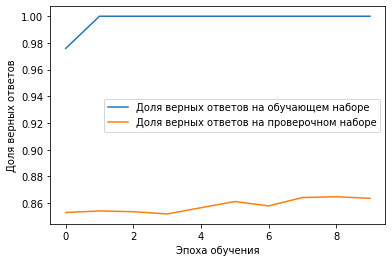

END
************************************************** 

--------------------------------------------------
START
hidden_size=200
layer=2
activation_1=relu
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 11ms/step - loss: 0.4789 - accuracy: 0.9708 - val_loss: 0.5778 - val_accuracy: 0.7948
Epoch 2/10
138/138 [==============================] - 1s 9ms/step - loss: 0.0556 - accuracy: 0.9972 - val_loss: 0.4661 - val_accuracy: 0.8235
Epoch 3/10
138/138 [==============================] - 1s 9ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.5497 - val_accuracy: 0.7894
Epoch 4/10
138/138 [==============================] - 1s 9ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.5663 - val_accuracy: 0.7843
Epoch 5/10
138/138 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.6307 - val_accuracy: 0.7637
Epoch 6/10
138/138 [==============================] - 1s 9ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 

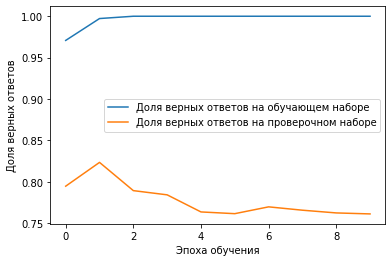

END
************************************************** 

--------------------------------------------------
START
hidden_size=200
layer=2
activation_1=linear
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 11ms/step - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.4553 - val_accuracy: 0.8554
Epoch 2/10
138/138 [==============================] - 1s 9ms/step - loss: 4.7862e-04 - accuracy: 1.0000 - val_loss: 0.4434 - val_accuracy: 0.8605
Epoch 3/10
138/138 [==============================] - 1s 9ms/step - loss: 2.3503e-04 - accuracy: 1.0000 - val_loss: 0.4334 - val_accuracy: 0.8646
Epoch 4/10
138/138 [==============================] - 1s 9ms/step - loss: 1.4927e-04 - accuracy: 1.0000 - val_loss: 0.4270 - val_accuracy: 0.8664
Epoch 5/10
138/138 [==============================] - 1s 9ms/step - loss: 1.0526e-04 - accuracy: 1.0000 - val_loss: 0.4230 - val_accuracy: 0.8679
Epoch 6/10
138/138 [==============================] - 1s 9ms/step - loss: 8.1380e-05 - accurac

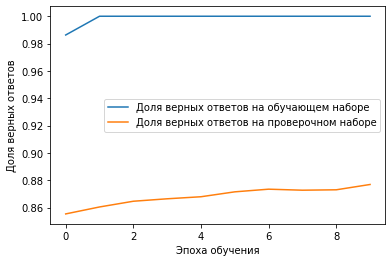

END
************************************************** 

--------------------------------------------------
START
hidden_size=200
layer=2
activation_1=linear
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 11ms/step - loss: 0.4224 - accuracy: 0.9351 - val_loss: 0.8525 - val_accuracy: 0.8406
Epoch 2/10
138/138 [==============================] - 1s 9ms/step - loss: 0.1795 - accuracy: 0.8902 - val_loss: 0.7159 - val_accuracy: 0.7516
Epoch 3/10
138/138 [==============================] - 1s 9ms/step - loss: 0.1571 - accuracy: 0.8833 - val_loss: 0.6816 - val_accuracy: 0.6983
Epoch 4/10
138/138 [==============================] - 1s 9ms/step - loss: 0.1516 - accuracy: 0.8811 - val_loss: 0.6768 - val_accuracy: 0.6503
Epoch 5/10
138/138 [==============================] - 1s 9ms/step - loss: 0.1493 - accuracy: 0.8809 - val_loss: 0.6999 - val_accuracy: 0.6363
Epoch 6/10
138/138 [==============================] - 1s 9ms/step - loss: 0.1484 - accuracy: 0.8806 - val_loss

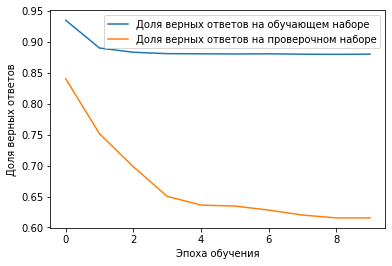

END
************************************************** 

--------------------------------------------------
START
hidden_size=200
layer=3
activation_1=relu
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 12ms/step - loss: 0.1540 - accuracy: 0.9518 - val_loss: 0.7018 - val_accuracy: 0.7420
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.6997 - val_accuracy: 0.7398
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6742 - val_accuracy: 0.7499
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.6408 - val_accuracy: 0.7665
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 5.6871e-04 - accuracy: 1.0000 - val_loss: 0.6366 - val_accuracy: 0.7697
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 3.8858e-04 - accuracy: 1.0000

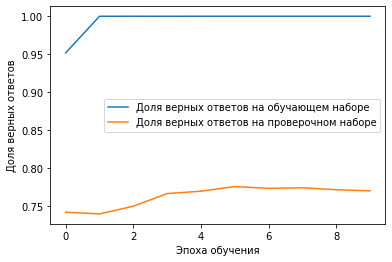

END
************************************************** 

--------------------------------------------------
START
hidden_size=200
layer=3
activation_1=relu
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 12ms/step - loss: 0.5466 - accuracy: 0.9418 - val_loss: 1.2696 - val_accuracy: 0.6235
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1372 - accuracy: 0.9857 - val_loss: 1.6442 - val_accuracy: 0.5796
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1089 - accuracy: 0.9918 - val_loss: 1.3422 - val_accuracy: 0.6379
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1039 - accuracy: 0.9944 - val_loss: 1.5145 - val_accuracy: 0.6309
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1026 - accuracy: 0.9935 - val_loss: 1.5317 - val_accuracy: 0.6120
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1012 - accuracy: 0.9942 - val_l

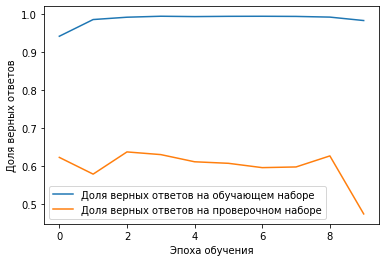

END
************************************************** 

--------------------------------------------------
START
hidden_size=200
layer=3
activation_1=linear
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0538 - accuracy: 0.9831 - val_loss: 0.5719 - val_accuracy: 0.7996
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 6.0921e-04 - accuracy: 1.0000 - val_loss: 0.5404 - val_accuracy: 0.8174
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 2.9690e-04 - accuracy: 1.0000 - val_loss: 0.5201 - val_accuracy: 0.8270
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 2.1415e-04 - accuracy: 1.0000 - val_loss: 0.5140 - val_accuracy: 0.8276
Epoch 5/10
138/138 [==============================] - 1s 9ms/step - loss: 1.3477e-04 - accuracy: 1.0000 - val_loss: 0.5070 - val_accuracy: 0.8299
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 1.0716e-04 - acc

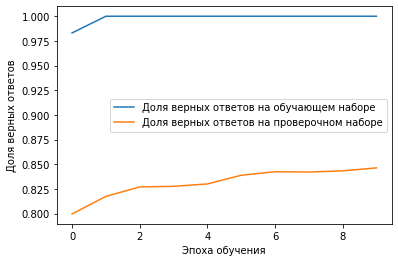

END
************************************************** 

--------------------------------------------------
START
hidden_size=200
layer=3
activation_1=linear
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 12ms/step - loss: 0.4590 - accuracy: 0.9341 - val_loss: 0.8111 - val_accuracy: 0.7754
Epoch 2/10
138/138 [==============================] - 1s 9ms/step - loss: 0.1322 - accuracy: 0.8844 - val_loss: 0.5487 - val_accuracy: 0.7066
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0955 - accuracy: 0.8795 - val_loss: 0.5037 - val_accuracy: 0.6937
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0888 - accuracy: 0.8792 - val_loss: 0.4844 - val_accuracy: 0.6956
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0868 - accuracy: 0.8790 - val_loss: 0.4750 - val_accuracy: 0.7092
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0855 - accuracy: 0.8790 - val_

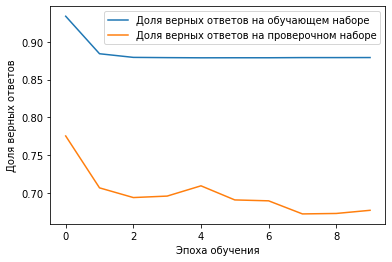

END
************************************************** 

--------------------------------------------------
START
hidden_size=500
layer=1
activation_1=relu
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 11ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.4514 - val_accuracy: 0.8533
Epoch 2/10
138/138 [==============================] - 1s 9ms/step - loss: 9.3839e-05 - accuracy: 1.0000 - val_loss: 0.3878 - val_accuracy: 0.8646
Epoch 3/10
138/138 [==============================] - 1s 9ms/step - loss: 4.1580e-05 - accuracy: 1.0000 - val_loss: 0.3898 - val_accuracy: 0.8614
Epoch 4/10
138/138 [==============================] - 1s 9ms/step - loss: 2.4513e-05 - accuracy: 1.0000 - val_loss: 0.3997 - val_accuracy: 0.8594
Epoch 5/10
138/138 [==============================] - 1s 9ms/step - loss: 1.7287e-05 - accuracy: 1.0000 - val_loss: 0.4056 - val_accuracy: 0.8579
Epoch 6/10
138/138 [==============================] - 1s 9ms/step - loss: 1.3073e-05 - accuracy:

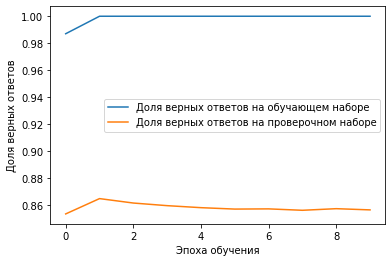

END
************************************************** 

--------------------------------------------------
START
hidden_size=500
layer=1
activation_1=relu
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 11ms/step - loss: 0.2724 - accuracy: 0.9856 - val_loss: 0.5268 - val_accuracy: 0.9147
Epoch 2/10
138/138 [==============================] - 1s 9ms/step - loss: 0.0310 - accuracy: 0.9980 - val_loss: 0.3419 - val_accuracy: 0.9143
Epoch 3/10
138/138 [==============================] - 1s 9ms/step - loss: 0.0070 - accuracy: 0.9999 - val_loss: 0.2972 - val_accuracy: 0.9119
Epoch 4/10
138/138 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3001 - val_accuracy: 0.9095
Epoch 5/10
138/138 [==============================] - 1s 9ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2822 - val_accuracy: 0.9146
Epoch 6/10
138/138 [==============================] - 1s 9ms/step - loss: 8.5855e-04 - accuracy: 1.0000 - val_lo

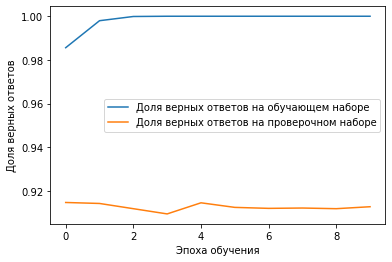

END
************************************************** 

--------------------------------------------------
START
hidden_size=500
layer=1
activation_1=linear
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 11ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.4210 - val_accuracy: 0.8611
Epoch 2/10
138/138 [==============================] - 1s 9ms/step - loss: 1.1556e-04 - accuracy: 1.0000 - val_loss: 0.3549 - val_accuracy: 0.8829
Epoch 3/10
138/138 [==============================] - 1s 9ms/step - loss: 5.5417e-05 - accuracy: 1.0000 - val_loss: 0.3469 - val_accuracy: 0.8856
Epoch 4/10
138/138 [==============================] - 1s 9ms/step - loss: 4.0574e-05 - accuracy: 1.0000 - val_loss: 0.3491 - val_accuracy: 0.8850
Epoch 5/10
138/138 [==============================] - 1s 9ms/step - loss: 2.9122e-05 - accuracy: 1.0000 - val_loss: 0.3450 - val_accuracy: 0.8877
Epoch 6/10
138/138 [==============================] - 1s 9ms/step - loss: 2.2939e-05 - accurac

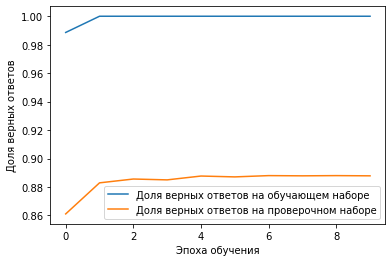

END
************************************************** 

--------------------------------------------------
START
hidden_size=500
layer=1
activation_1=linear
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 11ms/step - loss: 0.3159 - accuracy: 0.9682 - val_loss: 0.8555 - val_accuracy: 0.8292
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0886 - accuracy: 0.9657 - val_loss: 0.5741 - val_accuracy: 0.8736
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0426 - accuracy: 0.9816 - val_loss: 0.4418 - val_accuracy: 0.8911
Epoch 4/10
138/138 [==============================] - 1s 9ms/step - loss: 0.0194 - accuracy: 0.9911 - val_loss: 0.3802 - val_accuracy: 0.8996
Epoch 5/10
138/138 [==============================] - 1s 9ms/step - loss: 0.0049 - accuracy: 0.9996 - val_loss: 0.3613 - val_accuracy: 0.8987
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 8.4781e-04 - accuracy: 1.0000 - v

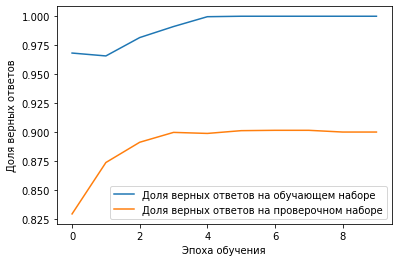

END
************************************************** 

--------------------------------------------------
START
hidden_size=500
layer=2
activation_1=relu
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0546 - accuracy: 0.9830 - val_loss: 0.4244 - val_accuracy: 0.8452
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 1.9347e-04 - accuracy: 1.0000 - val_loss: 0.4388 - val_accuracy: 0.8337
Epoch 3/10
138/138 [==============================] - 1s 9ms/step - loss: 9.6429e-05 - accuracy: 1.0000 - val_loss: 0.4261 - val_accuracy: 0.8379
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 6.3484e-05 - accuracy: 1.0000 - val_loss: 0.4281 - val_accuracy: 0.8361
Epoch 5/10
138/138 [==============================] - 1s 9ms/step - loss: 4.9970e-05 - accuracy: 1.0000 - val_loss: 0.4216 - val_accuracy: 0.8401
Epoch 6/10
138/138 [==============================] - 1s 9ms/step - loss: 3.2211e-05 - accurac

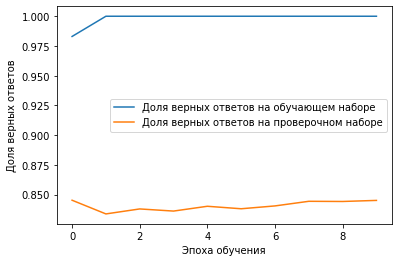

END
************************************************** 

--------------------------------------------------
START
hidden_size=500
layer=2
activation_1=relu
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 12ms/step - loss: 0.2887 - accuracy: 0.9265 - val_loss: 0.7413 - val_accuracy: 0.7302
Epoch 2/10
138/138 [==============================] - 1s 9ms/step - loss: 0.0635 - accuracy: 0.9297 - val_loss: 1.1214 - val_accuracy: 0.6505
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0491 - accuracy: 0.9417 - val_loss: 1.3813 - val_accuracy: 0.5923
Epoch 4/10
138/138 [==============================] - 1s 9ms/step - loss: 0.0157 - accuracy: 0.9871 - val_loss: 1.0956 - val_accuracy: 0.6587
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.1114 - val_accuracy: 0.6648
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 8.6631e-04 - accuracy: 1.0000 - val

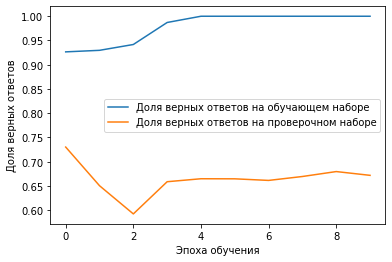

END
************************************************** 

--------------------------------------------------
START
hidden_size=500
layer=2
activation_1=linear
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.7211 - val_accuracy: 0.7625
Epoch 2/10
138/138 [==============================] - 1s 9ms/step - loss: 8.6719e-05 - accuracy: 1.0000 - val_loss: 0.6601 - val_accuracy: 0.7786
Epoch 3/10
138/138 [==============================] - 1s 9ms/step - loss: 4.9282e-05 - accuracy: 1.0000 - val_loss: 0.6544 - val_accuracy: 0.7801
Epoch 4/10
138/138 [==============================] - 1s 9ms/step - loss: 4.0304e-05 - accuracy: 1.0000 - val_loss: 0.6369 - val_accuracy: 0.7846
Epoch 5/10
138/138 [==============================] - 1s 9ms/step - loss: 2.4792e-05 - accuracy: 1.0000 - val_loss: 0.6269 - val_accuracy: 0.7876
Epoch 6/10
138/138 [==============================] - 1s 9ms/step - loss: 1.8634e-05 - accurac

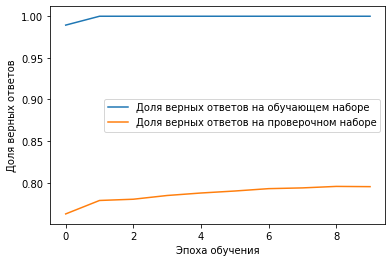

END
************************************************** 

--------------------------------------------------
START
hidden_size=500
layer=2
activation_1=linear
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 12ms/step - loss: 0.3374 - accuracy: 0.8905 - val_loss: 0.7218 - val_accuracy: 0.7846
Epoch 2/10
138/138 [==============================] - 1s 9ms/step - loss: 0.1600 - accuracy: 0.8662 - val_loss: 0.6147 - val_accuracy: 0.7716
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1398 - accuracy: 0.8633 - val_loss: 0.5292 - val_accuracy: 0.7701
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1248 - accuracy: 0.8630 - val_loss: 0.4732 - val_accuracy: 0.7611
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1012 - accuracy: 0.8761 - val_loss: 0.4837 - val_accuracy: 0.8187
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0327 - accuracy: 0.9766 - val_

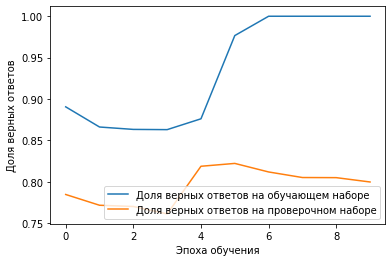

END
************************************************** 

--------------------------------------------------
START
hidden_size=500
layer=3
activation_1=relu
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0875 - accuracy: 0.9706 - val_loss: 0.7822 - val_accuracy: 0.7420
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 4.1344e-04 - accuracy: 1.0000 - val_loss: 0.7582 - val_accuracy: 0.7477
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 2.3667e-04 - accuracy: 1.0000 - val_loss: 0.7679 - val_accuracy: 0.7460
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 1.4979e-04 - accuracy: 1.0000 - val_loss: 0.7672 - val_accuracy: 0.7463
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 9.1495e-05 - accuracy: 1.0000 - val_loss: 0.8099 - val_accuracy: 0.7348
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 6.6402e-05 - accu

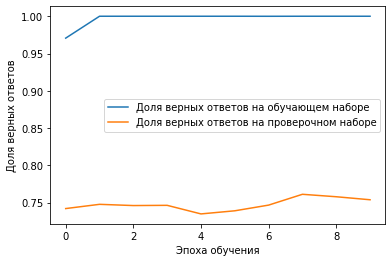

END
************************************************** 

--------------------------------------------------
START
hidden_size=500
layer=3
activation_1=relu
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 12ms/step - loss: 0.3699 - accuracy: 0.9041 - val_loss: 0.9920 - val_accuracy: 0.5879
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0932 - accuracy: 0.8820 - val_loss: 1.1166 - val_accuracy: 0.5712
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0872 - accuracy: 0.8794 - val_loss: 1.2733 - val_accuracy: 0.5610
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0857 - accuracy: 0.8791 - val_loss: 1.3870 - val_accuracy: 0.5531
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0850 - accuracy: 0.8790 - val_loss: 1.4295 - val_accuracy: 0.5517
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0847 - accuracy: 0.8790 - val_l

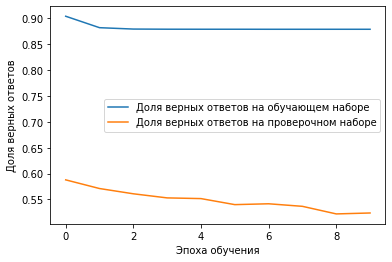

END
************************************************** 

--------------------------------------------------
START
hidden_size=500
layer=3
activation_1=linear
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0387 - accuracy: 0.9872 - val_loss: 0.5015 - val_accuracy: 0.8430
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 1.0292e-04 - accuracy: 1.0000 - val_loss: 0.4815 - val_accuracy: 0.8506
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 5.1497e-05 - accuracy: 1.0000 - val_loss: 0.4775 - val_accuracy: 0.8504
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 3.5803e-05 - accuracy: 1.0000 - val_loss: 0.4711 - val_accuracy: 0.8507
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 2.4956e-05 - accuracy: 1.0000 - val_loss: 0.4585 - val_accuracy: 0.8552
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 1.7488e-05 - ac

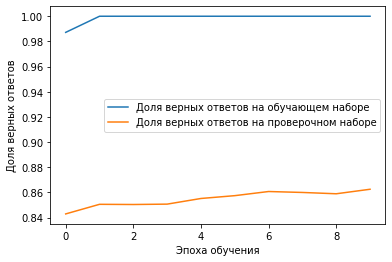

END
************************************************** 

--------------------------------------------------
START
hidden_size=500
layer=3
activation_1=linear
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 13ms/step - loss: 0.3648 - accuracy: 0.8990 - val_loss: 0.8624 - val_accuracy: 0.6431
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1655 - accuracy: 0.8795 - val_loss: 0.7084 - val_accuracy: 0.6469
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1509 - accuracy: 0.8793 - val_loss: 0.6481 - val_accuracy: 0.6584
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1489 - accuracy: 0.8793 - val_loss: 0.6853 - val_accuracy: 0.6382
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1481 - accuracy: 0.8792 - val_loss: 0.7043 - val_accuracy: 0.6319
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1475 - accuracy: 0.8794 - val

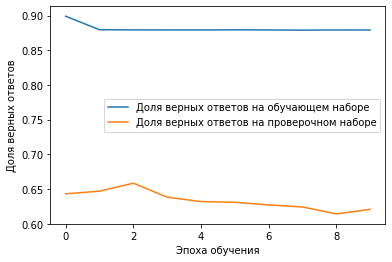

END
************************************************** 

--------------------------------------------------
START
hidden_size=1000
layer=1
activation_1=relu
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0330 - accuracy: 0.9899 - val_loss: 0.4456 - val_accuracy: 0.8455
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 4.1237e-05 - accuracy: 1.0000 - val_loss: 0.4415 - val_accuracy: 0.8431
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 2.0362e-05 - accuracy: 1.0000 - val_loss: 0.4589 - val_accuracy: 0.8403
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 1.3120e-05 - accuracy: 1.0000 - val_loss: 0.4612 - val_accuracy: 0.8424
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 9.5466e-06 - accuracy: 1.0000 - val_loss: 0.4617 - val_accuracy: 0.8419
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 7.2272e-06 - acc

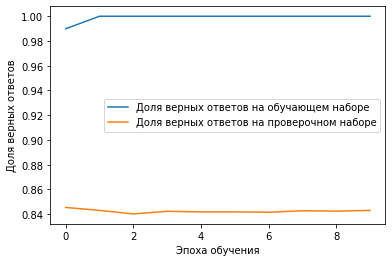

END
************************************************** 

--------------------------------------------------
START
hidden_size=1000
layer=1
activation_1=relu
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 12ms/step - loss: 0.2373 - accuracy: 0.9730 - val_loss: 0.4759 - val_accuracy: 0.9043
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0307 - accuracy: 0.9859 - val_loss: 0.3593 - val_accuracy: 0.9071
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0098 - accuracy: 0.9929 - val_loss: 0.3219 - val_accuracy: 0.9138
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.3027 - val_accuracy: 0.9125
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 6.2175e-04 - accuracy: 1.0000 - val_loss: 0.2911 - val_accuracy: 0.9149
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 5.7625e-04 - accuracy: 1.000

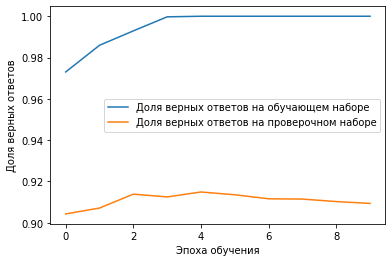

END
************************************************** 

--------------------------------------------------
START
hidden_size=1000
layer=1
activation_1=linear
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0338 - accuracy: 0.9898 - val_loss: 0.5950 - val_accuracy: 0.8265
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 9.1668e-05 - accuracy: 1.0000 - val_loss: 0.5416 - val_accuracy: 0.8448
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 2.8157e-05 - accuracy: 1.0000 - val_loss: 0.5507 - val_accuracy: 0.8424
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 1.8782e-05 - accuracy: 1.0000 - val_loss: 0.5596 - val_accuracy: 0.8425
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 3.7268e-05 - accuracy: 1.0000 - val_loss: 0.5611 - val_accuracy: 0.8419
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 1.2636e-05 - a

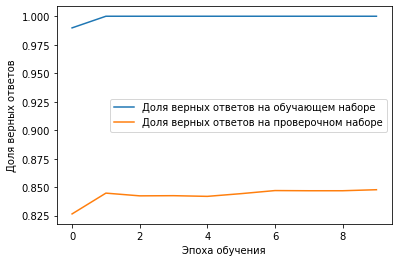

END
************************************************** 

--------------------------------------------------
START
hidden_size=1000
layer=1
activation_1=linear
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 12ms/step - loss: 0.3117 - accuracy: 0.9515 - val_loss: 0.7319 - val_accuracy: 0.8718
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0858 - accuracy: 0.9578 - val_loss: 0.5011 - val_accuracy: 0.8972
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0491 - accuracy: 0.9654 - val_loss: 0.4234 - val_accuracy: 0.8999
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0249 - accuracy: 0.9769 - val_loss: 0.3729 - val_accuracy: 0.9025
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0082 - accuracy: 0.9961 - val_loss: 0.3270 - val_accuracy: 0.9088
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 5.1720e-04 - accuracy: 1.0000 

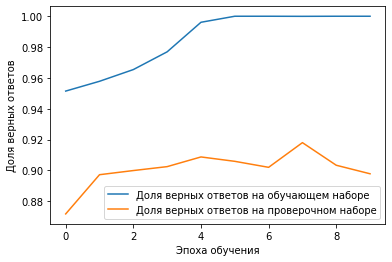

END
************************************************** 

--------------------------------------------------
START
hidden_size=1000
layer=2
activation_1=relu
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0440 - accuracy: 0.9858 - val_loss: 0.6633 - val_accuracy: 0.7700
Epoch 2/10
138/138 [==============================] - 1s 11ms/step - loss: 7.8232e-05 - accuracy: 1.0000 - val_loss: 0.7503 - val_accuracy: 0.7552
Epoch 3/10
138/138 [==============================] - 1s 11ms/step - loss: 3.5329e-05 - accuracy: 1.0000 - val_loss: 0.7292 - val_accuracy: 0.7622
Epoch 4/10
138/138 [==============================] - 1s 11ms/step - loss: 1.8185e-05 - accuracy: 1.0000 - val_loss: 0.7332 - val_accuracy: 0.7617
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 1.1773e-05 - accuracy: 1.0000 - val_loss: 0.7304 - val_accuracy: 0.7619
Epoch 6/10
138/138 [==============================] - 1s 11ms/step - loss: 1.0490e-05 - acc

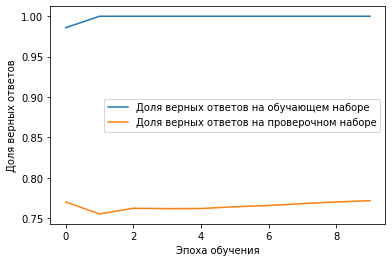

END
************************************************** 

--------------------------------------------------
START
hidden_size=1000
layer=2
activation_1=relu
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 13ms/step - loss: 0.2128 - accuracy: 0.9181 - val_loss: 0.7094 - val_accuracy: 0.7535
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0573 - accuracy: 0.9276 - val_loss: 0.9343 - val_accuracy: 0.6865
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0467 - accuracy: 0.9379 - val_loss: 1.0346 - val_accuracy: 0.6684
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0354 - accuracy: 0.9584 - val_loss: 0.9634 - val_accuracy: 0.6986
Epoch 5/10
138/138 [==============================] - 1s 11ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.8454 - val_accuracy: 0.7291
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 4.7571e-04 - accuracy: 1.0000 - 

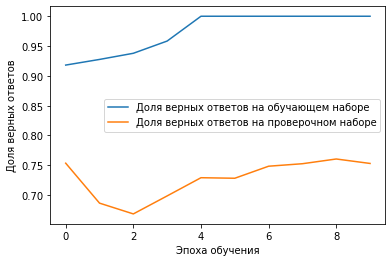

END
************************************************** 

--------------------------------------------------
START
hidden_size=1000
layer=2
activation_1=linear
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0348 - accuracy: 0.9889 - val_loss: 0.9974 - val_accuracy: 0.7721
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 7.0579e-05 - accuracy: 1.0000 - val_loss: 0.8479 - val_accuracy: 0.7939
Epoch 3/10
138/138 [==============================] - 1s 11ms/step - loss: 2.3612e-05 - accuracy: 1.0000 - val_loss: 0.8208 - val_accuracy: 0.7978
Epoch 4/10
138/138 [==============================] - 1s 11ms/step - loss: 1.9920e-05 - accuracy: 1.0000 - val_loss: 0.8046 - val_accuracy: 0.8071
Epoch 5/10
138/138 [==============================] - 1s 11ms/step - loss: 7.6538e-06 - accuracy: 1.0000 - val_loss: 0.8017 - val_accuracy: 0.8048
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 5.0091e-06 - a

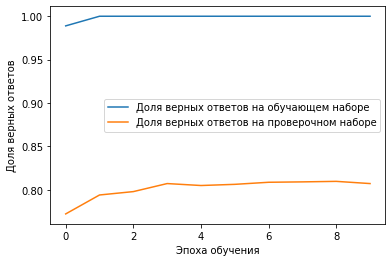

END
************************************************** 

--------------------------------------------------
START
hidden_size=1000
layer=2
activation_1=linear
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 13ms/step - loss: 0.3178 - accuracy: 0.8991 - val_loss: 0.6115 - val_accuracy: 0.8196
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 0.1107 - accuracy: 0.8832 - val_loss: 0.4575 - val_accuracy: 0.8497
Epoch 3/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0622 - accuracy: 0.9427 - val_loss: 0.3818 - val_accuracy: 0.8688
Epoch 4/10
138/138 [==============================] - 1s 10ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5247 - val_accuracy: 0.8047
Epoch 5/10
138/138 [==============================] - 1s 10ms/step - loss: 3.9721e-04 - accuracy: 1.0000 - val_loss: 0.5456 - val_accuracy: 0.7994
Epoch 6/10
138/138 [==============================] - 1s 10ms/step - loss: 2.9088e-04 - accuracy: 1.0

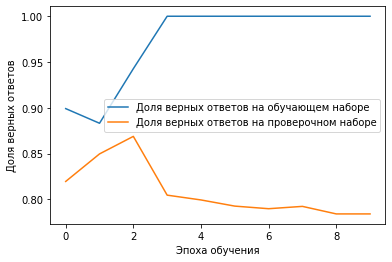

END
************************************************** 

--------------------------------------------------
START
hidden_size=1000
layer=3
activation_1=relu
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 14ms/step - loss: 0.0595 - accuracy: 0.9806 - val_loss: 0.8571 - val_accuracy: 0.7430
Epoch 2/10
138/138 [==============================] - 2s 11ms/step - loss: 1.3809e-04 - accuracy: 1.0000 - val_loss: 0.7072 - val_accuracy: 0.7833
Epoch 3/10
138/138 [==============================] - 2s 11ms/step - loss: 3.9435e-05 - accuracy: 1.0000 - val_loss: 0.7095 - val_accuracy: 0.7803
Epoch 4/10
138/138 [==============================] - 2s 11ms/step - loss: 2.4587e-05 - accuracy: 1.0000 - val_loss: 0.7271 - val_accuracy: 0.7774
Epoch 5/10
138/138 [==============================] - 2s 11ms/step - loss: 3.1738e-05 - accuracy: 1.0000 - val_loss: 0.7190 - val_accuracy: 0.7833
Epoch 6/10
138/138 [==============================] - 2s 11ms/step - loss: 3.3987e-05 - acc

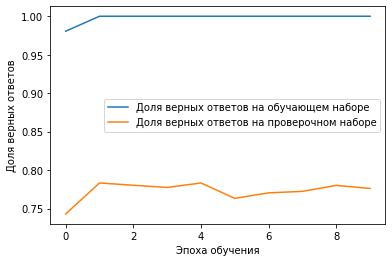

END
************************************************** 

--------------------------------------------------
START
hidden_size=1000
layer=3
activation_1=relu
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 14ms/step - loss: 0.2525 - accuracy: 0.8875 - val_loss: 1.5721 - val_accuracy: 0.5360
Epoch 2/10
138/138 [==============================] - 2s 11ms/step - loss: 0.0871 - accuracy: 0.8795 - val_loss: 1.9488 - val_accuracy: 0.4837
Epoch 3/10
138/138 [==============================] - 1s 11ms/step - loss: 0.0852 - accuracy: 0.8790 - val_loss: 2.2561 - val_accuracy: 0.4707
Epoch 4/10
138/138 [==============================] - 2s 11ms/step - loss: 0.0847 - accuracy: 0.8790 - val_loss: 2.4210 - val_accuracy: 0.4613
Epoch 5/10
138/138 [==============================] - 2s 11ms/step - loss: 0.0845 - accuracy: 0.8790 - val_loss: 2.7485 - val_accuracy: 0.4542
Epoch 6/10
138/138 [==============================] - 2s 11ms/step - loss: 0.0844 - accuracy: 0.8790 - val_

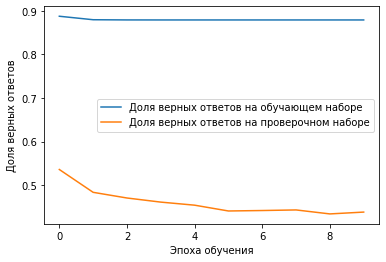

END
************************************************** 

--------------------------------------------------
START
hidden_size=1000
layer=3
activation_1=linear
activation_2=softmax
Epoch 1/10
138/138 [==============================] - 2s 14ms/step - loss: 0.0414 - accuracy: 0.9869 - val_loss: 0.9406 - val_accuracy: 0.7523
Epoch 2/10
138/138 [==============================] - 2s 11ms/step - loss: 1.3306e-04 - accuracy: 1.0000 - val_loss: 0.8483 - val_accuracy: 0.7754
Epoch 3/10
138/138 [==============================] - 2s 11ms/step - loss: 3.4668e-05 - accuracy: 1.0000 - val_loss: 0.8305 - val_accuracy: 0.7785
Epoch 4/10
138/138 [==============================] - 2s 11ms/step - loss: 1.7145e-05 - accuracy: 1.0000 - val_loss: 0.8206 - val_accuracy: 0.7786
Epoch 5/10
138/138 [==============================] - 2s 12ms/step - loss: 1.8183e-05 - accuracy: 1.0000 - val_loss: 0.8115 - val_accuracy: 0.7834
Epoch 6/10
138/138 [==============================] - 2s 12ms/step - loss: 1.8876e-05 - a

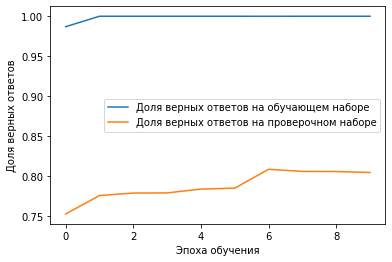

END
************************************************** 

--------------------------------------------------
START
hidden_size=1000
layer=3
activation_1=linear
activation_2=sigmoid
Epoch 1/10
138/138 [==============================] - 2s 13ms/step - loss: 0.3604 - accuracy: 0.8124 - val_loss: 0.7356 - val_accuracy: 0.6880
Epoch 2/10
138/138 [==============================] - 2s 11ms/step - loss: 0.1923 - accuracy: 0.7982 - val_loss: 0.6252 - val_accuracy: 0.6490
Epoch 3/10
138/138 [==============================] - 2s 11ms/step - loss: 0.1681 - accuracy: 0.8071 - val_loss: 0.6361 - val_accuracy: 0.6321
Epoch 4/10
138/138 [==============================] - 2s 11ms/step - loss: 0.1662 - accuracy: 0.8131 - val_loss: 0.6574 - val_accuracy: 0.6300
Epoch 5/10
138/138 [==============================] - 2s 11ms/step - loss: 0.1657 - accuracy: 0.8127 - val_loss: 0.7006 - val_accuracy: 0.6247
Epoch 6/10
138/138 [==============================] - 2s 11ms/step - loss: 0.1656 - accuracy: 0.8104 - va

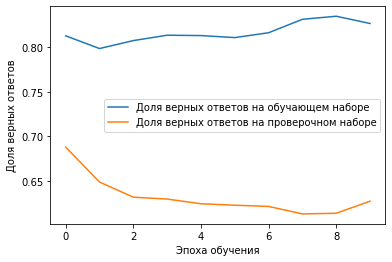

END
************************************************** 



In [ ]:
hidden_sizes = [200, 500, 1000]
layers = [1, 2, 3]
activations_1 = ['relu', 'linear']
activations_2 = ['softmax', 'sigmoid']

hidden_size_arr = []
layers_arr = []
activations_1_arr = []
activations_2_arr = []
acc_arr = []
val_acc_arr = []

for hidden_size in hidden_sizes:
  for layer in layers:
    for activation_1 in activations_1: 
      for activation_2 in activations_2:
        print('-----'*10)
        print('START')
        print(f'hidden_size={hidden_size}')
        print(f'layer={layer}')
        print(f'activation_1={activation_1}')
        print(f'activation_2={activation_2}')

        dense_in = Dense(hidden_size, input_dim=maxWordsCount, activation=activation_1)
        dense_2 = Dense(hidden_size, activation=activation_1)
        dense_3 = Dense(hidden_size, activation=activation_1)
        dropout = Dropout(0.25)
        batch_norm = BatchNormalization()
        dense_out = Dense(6, activation=activation_2)


        if layer == 1:
          model01 = Sequential([dense_in, dropout, batch_norm, dense_out])

        elif layer == 2:
          model01 = Sequential([dense_in, dropout, batch_norm,
                                dense_2, dropout, batch_norm,
                                dense_out])
          
        elif layer == 3:
          model01 = Sequential([dense_in, dropout, batch_norm,
                                dense_2, dropout, batch_norm,
                                dense_3, dropout, batch_norm,
                                dense_out])
              

        model01.compile(optimizer='adam',
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])
        
        history = model01.fit(xTrain01, 
                              yTrain, 
                              epochs=10, 
                              batch_size=128,
                              validation_data=(xTest01, yTest))
        
        # График точности 
        plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
        plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Доля верных ответов')
        plt.legend()
        plt.show()

        acc_arr.append(history.history['accuracy'][-1]) # accuracy на последней эпохе
        val_acc_arr.append(history.history['val_accuracy'][-1]) # val_accuracy на последней эпохе
        hidden_size_arr.append(hidden_size)
        layers_arr.append(layer)
        activations_1_arr.append(activation_1)
        activations_2_arr.append(activation_2)

        print('END')
        print('*****'*10, '\n')




In [ ]:
print(f'hidden_size_arr={hidden_size_arr}')
print(f'layers_arr={layers_arr}')
print(f'activations_1_arr={activations_1_arr}')
print(f'activations_2_arr={activations_2_arr}')
print(f'acc_arr={acc_arr}')
print(f'val_acc_arr={val_acc_arr}')
print(len(hidden_size_arr))
print(len(layers_arr))
print(len(activations_1_arr))
print(len(activations_2_arr))
print(len(acc_arr))
print(len(val_acc_arr))


hidden_size_arr=[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
layers_arr=[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
activations_1_arr=['relu', 'relu', 'linear', 'linear', 'relu', 'relu', 'linear', 'linear', 'relu', 'relu', 'linear', 'linear', 'relu', 'relu', 'linear', 'linear', 'relu', 'relu', 'linear', 'linear', 'relu', 'relu', 'linear', 'linear', 'relu', 'relu', 'linear', 'linear', 'relu', 'relu', 'linear', 'linear', 'relu', 'relu', 'linear', 'linear']
activations_2_arr=['softmax', 'sigmoid', 'softmax', 'sigmoid', 'softmax', 'sigmoid', 'softmax', 'sigmoid', 'softmax', 'sigmoid', 'softmax', 'sigmoid', 'softmax', 'sigmoid', 'softmax', 'sigmoid', 'softmax', 'sigmoid', 'softmax', 'sigmoid', 'softmax', 'sigmoid', 'softmax', 'sigmoid', 'softmax', 'sigmoid', 'softmax', 'sigmoid', '

In [ ]:
df_dict = {'hidden_size_arr':hidden_size_arr,
           'layers_arr':layers_arr,
           'activations_1_arr':activations_1_arr,
           'activations_2_arr':activations_2_arr,
           'acc_arr_last_epoch':acc_arr,
           'val_acc_arr':val_acc_arr}
df = pd.DataFrame(df_dict)
df

,hidden_size_arr,layers_arr,activations_1_arr,activations_2_arr,acc_arr_last_epoch,val_acc_arr
0,200,1,relu,softmax,1.000000,0.885731
1,200,1,relu,sigmoid,1.000000,0.904726
2,200,1,linear,softmax,1.000000,0.886629
3,200,1,linear,sigmoid,1.000000,0.902034
4,200,2,relu,softmax,1.000000,0.863596
5,200,2,relu,sigmoid,1.000000,0.761292
6,200,2,linear,softmax,1.000000,0.876907
7,200,2,linear,sigmoid,0.880329,0.615465
8,200,3,relu,softmax,1.000000,0.770117
9,200,3,relu,sigmoid,0.983107,0.475022


При активационных функциях relu и softmax - наибольшая точность. При разных количествах нейронов - точность не сильно меняется. Примерно равны между собой точности. При 1 одном слое точности выше чем при 2 или 3 слоях 

3.  **Запустите НС с Embbedding при maxWordsCount = 50000, поменяйте размер Embedding пространства**:
* 10
* 50 
* 200

--------------------------------------------------
START
output_dim=10
Epoch 1/10
138/138 [==============================] - 2s 14ms/step - loss: 0.8801 - accuracy: 0.7055 - val_loss: 1.6980 - val_accuracy: 0.3504
Epoch 2/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0267 - accuracy: 0.9961 - val_loss: 1.5564 - val_accuracy: 0.3462
Epoch 3/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0145 - accuracy: 0.9976 - val_loss: 1.3461 - val_accuracy: 0.4538
Epoch 4/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0084 - accuracy: 0.9989 - val_loss: 1.1389 - val_accuracy: 0.5757
Epoch 5/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0065 - accuracy: 0.9992 - val_loss: 1.0505 - val_accuracy: 0.6304
Epoch 6/10
138/138 [==============================] - 2s 13ms/step - loss: 0.0044 - accuracy: 0.9996 - val_loss: 0.9590 - val_accuracy: 0.6657
Epoch 7/10
138/138 [==============================] - 2s 13ms/step - lo

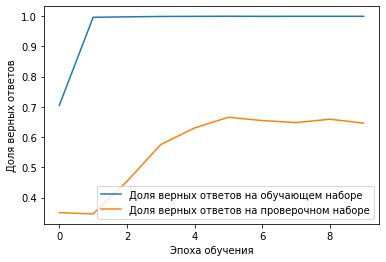

END
************************************************** /n
--------------------------------------------------
START
output_dim=20
Epoch 1/10
138/138 [==============================] - 3s 21ms/step - loss: 0.7505 - accuracy: 0.7599 - val_loss: 1.7381 - val_accuracy: 0.3177
Epoch 2/10
138/138 [==============================] - 3s 20ms/step - loss: 0.0120 - accuracy: 0.9994 - val_loss: 1.5504 - val_accuracy: 0.3370
Epoch 3/10
138/138 [==============================] - 3s 20ms/step - loss: 0.0056 - accuracy: 0.9999 - val_loss: 1.3138 - val_accuracy: 0.4441
Epoch 4/10
138/138 [==============================] - 3s 19ms/step - loss: 0.0039 - accuracy: 0.9998 - val_loss: 1.0825 - val_accuracy: 0.5817
Epoch 5/10
138/138 [==============================] - 3s 19ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.9785 - val_accuracy: 0.6499
Epoch 6/10
138/138 [==============================] - 3s 19ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 1.0636 - val_accuracy: 0.6360
Epoch 7/10
13

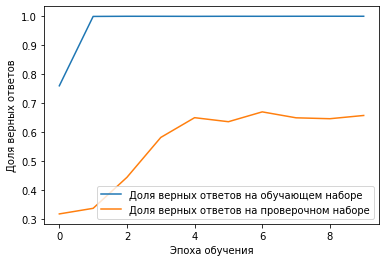

END
************************************************** /n
--------------------------------------------------
START
output_dim=50
Epoch 1/10
138/138 [==============================] - 5s 39ms/step - loss: 0.6344 - accuracy: 0.8082 - val_loss: 1.7520 - val_accuracy: 0.3612
Epoch 2/10
138/138 [==============================] - 5s 38ms/step - loss: 0.0082 - accuracy: 0.9997 - val_loss: 1.5723 - val_accuracy: 0.3567
Epoch 3/10
138/138 [==============================] - 5s 38ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.3426 - val_accuracy: 0.4545
Epoch 4/10
138/138 [==============================] - 5s 38ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 1.1652 - val_accuracy: 0.5600
Epoch 5/10
138/138 [==============================] - 5s 37ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.1092 - val_accuracy: 0.6051
Epoch 6/10
138/138 [==============================] - 5s 38ms/step - loss: 9.5889e-04 - accuracy: 1.0000 - val_loss: 1.1294 - val_accuracy: 0.6183
Epoch 7/1

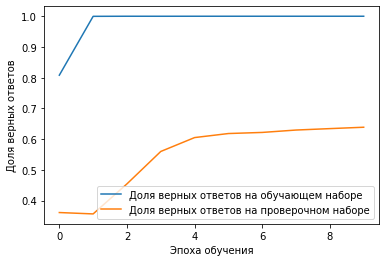

END
************************************************** /n
--------------------------------------------------
START
output_dim=200
Epoch 1/10
138/138 [==============================] - 17s 122ms/step - loss: 0.5344 - accuracy: 0.8472 - val_loss: 1.6606 - val_accuracy: 0.3593
Epoch 2/10
138/138 [==============================] - 17s 121ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 1.3792 - val_accuracy: 0.4339
Epoch 3/10
138/138 [==============================] - 17s 121ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.2191 - val_accuracy: 0.5187
Epoch 4/10
138/138 [==============================] - 17s 121ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.1096 - val_accuracy: 0.5811
Epoch 5/10
138/138 [==============================] - 17s 122ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.0860 - val_accuracy: 0.6099
Epoch 6/10
138/138 [==============================] - 17s 121ms/step - loss: 7.8085e-04 - accuracy: 1.0000 - val_loss: 1.0994 - val_accuracy: 0.6

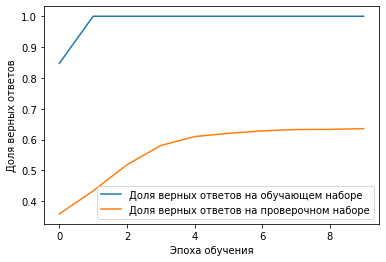

END
************************************************** /n


In [ ]:
maxWordsCount = 50000
xLen = 1000
output_dim_arr = [10, 20, 50, 200]
acc_arr = []
val_acc_arr = []

#Создание сети с Embedding слоем
def create_modelE(output_dim):
  modelE = Sequential()
  modelE.add(Embedding(maxWordsCount, output_dim, input_length=xLen))
  modelE.add(SpatialDropout1D(0.2))
  modelE.add(Flatten())
  modelE.add(BatchNormalization())
  modelE.add(Dense(200, activation="relu"))
  modelE.add(Dropout(0.2))
  modelE.add(BatchNormalization())
  modelE.add(Dense(6, activation='softmax'))

  modelE.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return modelE

for output_dim in output_dim_arr:
  print('-----'*10)
  print('START')
  print(f'output_dim={output_dim}')
  modelE = create_modelE(output_dim)

  #Обучение сети на xTrain
  history = modelE.fit(xTrain, 
                      yTrain, 
                      epochs=10,
                      batch_size=128,
                      validation_data=(xTest, yTest))


  plt.plot(history.history['accuracy'], 
          label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'], 
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()

  acc_arr.append(history.history['accuracy'][-1]) # accuracy на последней эпохе
  val_acc_arr.append(history.history['val_accuracy'][-1]) # val_accuracy на последней эпохе
  print('END')
  print('*****'*10,'/n')

In [ ]:
print(f'acc_arr={acc_arr}')
print(f'val_acc_arr={val_acc_arr}')

acc_arr=[0.9993197321891785, 0.9999433159828186, 1.0, 1.0]
val_acc_arr=[0.6462758183479309, 0.6574932932853699, 0.6387974619865417, 0.6356565952301025]


In [ ]:
df_dict_E = {'output_dim':output_dim_arr,
             'accuracy_last_epoch': acc_arr,
             'val_acc_last_epoch': val_acc_arr}
dfE = pd.DataFrame(df_dict_E)
dfE

,output_dim,accuracy_last_epoch,val_acc_last_epoch
0,10,0.999320,0.646276
1,20,0.999943,0.657493
2,50,1.000000,0.638797
3,200,1.000000,0.635657


Точность НС с Embbedding при различных размерах пространства [10, 20, 50, 200] не сильно меняется и почти одинакова

# Pro

## 1 Вариант

Epoch 1/150
144/144 [==============================] - 10s 66ms/step - loss: 0.8004 - accuracy: 0.7665 - val_loss: 3.0851 - val_accuracy: 0.3536
Epoch 2/150
144/144 [==============================] - 9s 65ms/step - loss: 0.2525 - accuracy: 0.8635 - val_loss: 2.4422 - val_accuracy: 0.3106
Epoch 3/150
144/144 [==============================] - 9s 65ms/step - loss: 0.1169 - accuracy: 0.9231 - val_loss: 1.7131 - val_accuracy: 0.3492
Epoch 4/150
144/144 [==============================] - 9s 65ms/step - loss: 0.0319 - accuracy: 0.9932 - val_loss: 1.1471 - val_accuracy: 0.6099
Epoch 5/150
144/144 [==============================] - 9s 65ms/step - loss: 0.0044 - accuracy: 0.9999 - val_loss: 1.0421 - val_accuracy: 0.6927
Epoch 6/150
144/144 [==============================] - 9s 65ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.9519 - val_accuracy: 0.7263
Epoch 7/150
144/144 [==============================] - 9s 66ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.9775 - val_accuracy

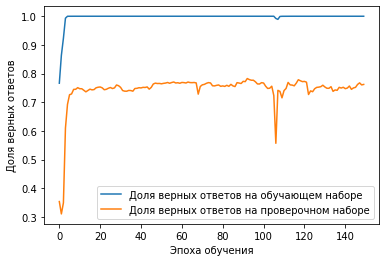

In [ ]:
# Embedding
maxWordsCount = 50000 #20000
xLen = 1000 #1000
step = 100 #100

tokenizer = Tokenizer(num_words=maxWordsCount, lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)

trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText) 

xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)

# сеть с Embedding слоем
modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 100, input_length=xLen)) #20
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.2))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='sigmoid'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучение сети на xTrain
history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=150, #10
                    batch_size=128,
                    validation_data=(xTest, yTest))


plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
modelE.save_weights('model.h5')

In [ ]:
modelE.load_weights('model.h5')

Epoch 1/40
143/143 [==============================] - 3s 20ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.2231 - val_accuracy: 0.9577
Epoch 2/40
143/143 [==============================] - 2s 16ms/step - loss: 1.2081e-04 - accuracy: 1.0000 - val_loss: 0.2092 - val_accuracy: 0.9694
Epoch 3/40
143/143 [==============================] - 2s 16ms/step - loss: 6.6287e-05 - accuracy: 1.0000 - val_loss: 0.2113 - val_accuracy: 0.9673
Epoch 4/40
143/143 [==============================] - 2s 16ms/step - loss: 4.0257e-05 - accuracy: 1.0000 - val_loss: 0.2040 - val_accuracy: 0.9710
Epoch 5/40
143/143 [==============================] - 2s 16ms/step - loss: 2.9957e-05 - accuracy: 1.0000 - val_loss: 0.1996 - val_accuracy: 0.9723
Epoch 6/40
143/143 [==============================] - 2s 16ms/step - loss: 2.5831e-05 - accuracy: 1.0000 - val_loss: 0.1981 - val_accuracy: 0.9713
Epoch 7/40
143/143 [==============================] - 2s 16ms/step - loss: 2.2279e-05 - accuracy: 1.0000 - val_loss: 0.195

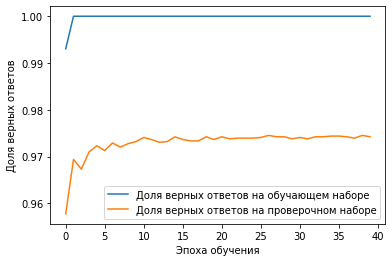

In [ ]:
# BOW
maxWordsCount = 50000 #20000
xLen = 4000 #1000
step = 100 #100

tokenizer = Tokenizer(num_words=maxWordsCount, lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)

trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)

xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)

xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist()) 
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())


model01 = Sequential()
model01.add(Dense(200, input_dim=maxWordsCount, activation="relu")) # 200
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучение сети на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=40, #10, 50
                      batch_size=128, #128
                      validation_data=(xTest01, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

При таком наборе параметров (см. выше) с использованием BOW получилось достичь 97%

In [ ]:
model01.save_weights('model.h5')

In [ ]:
model01.load_weights('model.h5')